In [1]:
from defectlib import extract_features_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
features, labels, sns, images = extract_features_from_defect('./ben1214/M2800/', comb=True)
features_test, labels_test, sns_test, images_test = extract_features_from_defect('./defect_tensors_D10/M2800/', comb=True)

features_all = np.concatenate((features, features_test))
labels_all = np.concatenate((labels, labels_test))
sns_all = np.concatenate((sns, sns_test))
images_all = np.concatenate((images, images_test))

there are 89 images inside M2800_2A_c10
Processing ./ben1214/M2800/2A/M2800_2A_c10/M2800_Recombination_F3Y64960927H3RPA_2A_0.jpg...
there are 212 images inside M2800_6A_c10
Processing ./ben1214/M2800/6A/M2800_6A_c10/M2800_Recombination_F3Y64960927H3RPA_6A_0.jpg...
Processing ./ben1214/M2800/6A/M2800_6A_c10/M2800_Recombination_F3Y650406UXGY2VA_6A_3.jpg...
Processing ./ben1214/M2800/6A/M2800_6A_c10/M2800_Recombination_F3Y65050CH8GY4VC_6A_9.jpg...
there are 69 images inside M2800_2A_c0
Processing ./defect_tensors_D10/M2800/2A/M2800_2A_c0/M2800_Recombination_0_2A_0.jpg...
there are 22 images inside M2800_2A_c10
Processing ./defect_tensors_D10/M2800/2A/M2800_2A_c10/M2800_Recombination_F3Y64850M9XGY4VB_2A_0.jpg...
there are 161 images inside M2800_6A_c0
Processing ./defect_tensors_D10/M2800/6A/M2800_6A_c0/M2800_Recombination_0_6A_0.jpg...
Processing ./defect_tensors_D10/M2800/6A/M2800_6A_c0/M2800_Recombination_3_6A_9.jpg...
there are 55 images inside M2800_6A_c10
Processing ./defect_tensors_

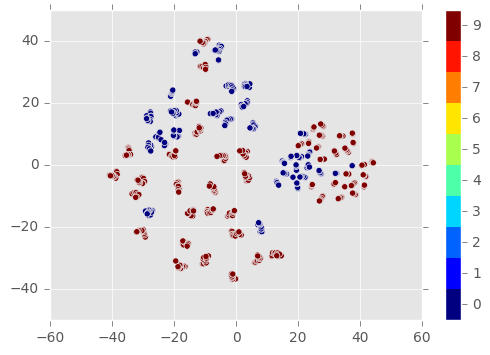

In [3]:
plot_tsne(features_all, labels_all, images_all, perplexity=15, interactive=False)

In [4]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.993464, total=   0.4s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.986842, total=   0.4s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.986755, total=   0.4s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.4s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.986842, total=   0.3s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.986755, total=   0.4s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.4s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.986842, total=   0.3s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.986755, total=   0.4s
[CV] kernel=linear, C=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   37.6s finished


Cannot save trained svm model to model.model

Best parameters set:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix:
Labels: 0,10

[[57  0]
 [ 0 95]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
         10       1.00      1.00      1.00        95

avg / total       1.00      1.00      1.00       152



GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [5]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [12]:
print 'test'

test


In [15]:
vis_data = bh_sne(features_all, perplexity=60)
vis_x = vis_data[:,0]
vis_y = vis_data[:,1]

vis_data_0 = vis_data[labels_all=='0']
vis_data_10 = vis_data[labels_all=='10']

vis_data_0_x = vis_data_0[:,0]
vis_data_0_y = vis_data_0[:,1]
vis_data_10_x = vis_data_10[:,0]
vis_data_10_y = vis_data_10[:,1]

In [16]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source1 = ColumnDataSource(
        data=dict(
            x=vis_data_0_x,
            y=vis_data_0_y,
            desc=sns_all[labels_all=='0'],
            imgs = images_all[labels_all=='0']

        )
    )



source2 = ColumnDataSource(
        data=dict(
            x=vis_data_10_x,
            y=vis_data_10_y,
            desc=sns_all[labels_all=='10'],
            imgs=images_all[labels_all=='10']
        )
    )


hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="80" alt="@imgs" width="80"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, alpha=0.5, color='green', source=source1)
p.circle('x', 'y', size=20, alpha=0.5, color='red', source=source2)

show(p)

In [9]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    print 'the number of S/Ns: is {}'.format(len(set(sns_in_label)))
    for sn in set(sns_in_label):
        print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 10 is 378
the number of S/Ns: is 26
	the number of S\N F3Y650500PQH3RPB:17
	the number of S\N F3Y65040DLRGY4TA:15
	the number of S\N F3Y65031A06GY4TA:15
	the number of S\N F3Y64950ZQZGY4TA:17
	the number of S\N F3Y65040DLSGY4TA:15
	the number of S\N F3Y649514EWGY4TA:15
	the number of S\N F3Y65050CH9GY4VC:16
	the number of S\N F3Y64850M9XGY4VB:14
	the number of S\N F3Y65020541GY2VA:15
	the number of S\N F3Y649607MNGY4VB:15
	the number of S\N F3Y64951F3YGY4TA:15
	the number of S\N F3Y650200QNGY2VA:14
	the number of S\N F3Y650406UXGY2VA:14
	the number of S\N F3Y650101RRGY2VA:14
	the number of S\N F3Y64850M9ZGY4VB:1
	the number of S\N F3Y65050CH8GY4VC:14
	the number of S\N F3Y650500PPH3RPB:15
	the number of S\N F3Y65040KAHGY4TA:16
	the number of S\N F3Y650507USGY4VC:16
	the number of S\N F3Y650500PRH3RPB:11
	the number of S\N F3Y64960927H3RPA:14
	the number of S\N F3Y6502076TGY2VA:17
	the number of S\N F3Y650405HTGY2VA:14
	the number of S\N F3Y6504029HGY2VA:19
	the numb